## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [14]:
import pandas as pd
#
var_list = ['year', 'wrkstat', 'hrs1', 'mntlhlth', 'happy', 'health', 'age', 'educ', 'degree', 'major1'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [15]:
# import the necessary libraries (pandas was already imported)
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"selected_gss_data.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop missing values in critical variables
df = df.dropna(subset=['wrkstat', 'mntlhlth', 'happy', 'health', 'educ', 'degree', 'major1'])

# Convert categorical variables
categorical_cols = ['wrkstat', 'degree', 'major1', 'happy', 'health']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Rename columns for clarity
df.rename(columns={'hrs1': 'Work_Hours', 'mntlhlth': 'Mental_Health', 'educ': 'Education_Level'}, inplace=True)


   year            wrkstat  hrs1  mntlhlth          happy     health   age  \
0  1972  working full time   NaN       NaN  not too happy       good  23.0   
1  1972            retired   NaN       NaN  not too happy       fair  70.0   
2  1972  working part time   NaN       NaN   pretty happy  excellent  48.0   
3  1972  working full time   NaN       NaN  not too happy       good  27.0   
4  1972      keeping house   NaN       NaN   pretty happy       good  61.0   

   educ                 degree major1  
0  16.0             bachelor's    NaN  
1  10.0  less than high school    NaN  
2  12.0            high school    NaN  
3  17.0             bachelor's    NaN  
4  12.0            high school    NaN  
year            0
wrkstat        36
hrs1        30830
mntlhlth    59148
happy        4802
health      17236
age           769
educ          263
degree        196
major1      65165
dtype: int64


In [17]:
#Provides insights into the average, median, and spread of work hours
print(df['Work_Hours'].describe())

# helps identify trends in overall well-being
print(df['happy'].value_counts())
print(df['health'].value_counts())

# Shows most common educational attainment
print(df['Education_Level'].value_counts())
print(df['degree'].value_counts())



count    2106.000000
mean       41.819563
std        13.780937
min         0.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        89.000000
Name: Work_Hours, dtype: float64
happy
pretty happy     1296
very happy        706
not too happy     284
Name: count, dtype: int64
health
good         1198
excellent     744
fair          318
poor           26
Name: count, dtype: int64
Education_Level
16.0    1003
18.0     303
14.0     273
20.0     239
17.0     234
19.0     117
15.0     101
13.0      15
12.0       1
Name: count, dtype: int64
degree
bachelor's                  1155
graduate                     695
associate/junior college     433
high school                    3
Name: count, dtype: int64


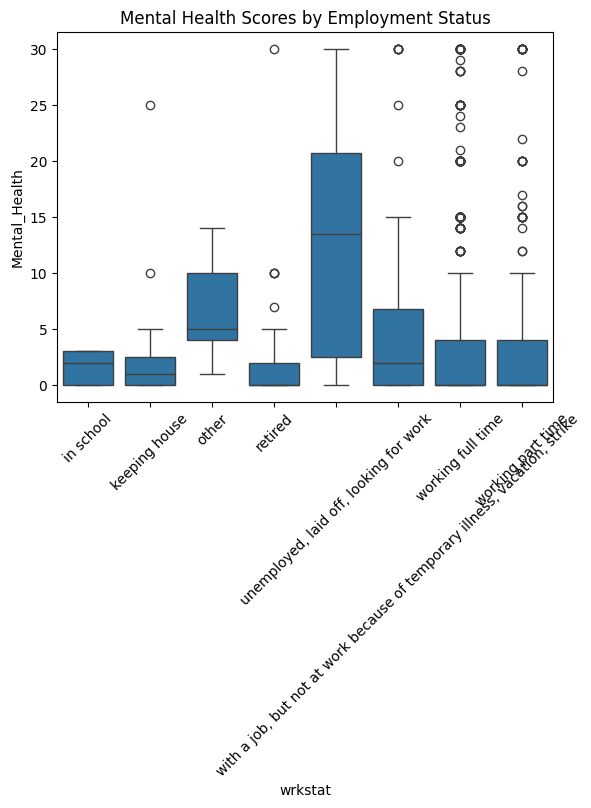

In [18]:
#This will show the cross between mental halth and employment status
sns.boxplot(x="wrkstat", y="Mental_Health", data=df)
plt.title("Mental Health Scores by Employment Status")
plt.xticks(rotation=45)
plt.show()

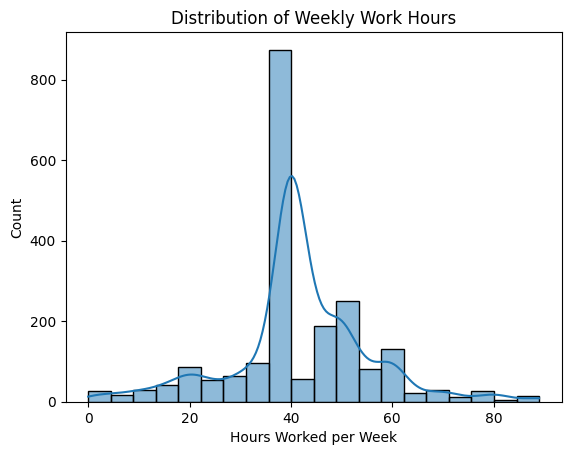

In [19]:
# Displays how many hours respondent typically work per week
sns.histplot(df['Work_Hours'], bins=20, kde=True)
plt.title("Distribution of Weekly Work Hours")
plt.xlabel("Hours Worked per Week")
plt.show()

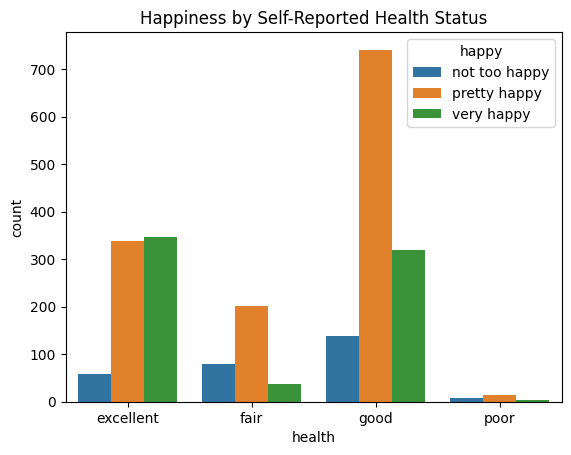

In [20]:
#Examines the relationship between self-reported health and happiness
sns.countplot(x="health", hue="happy", data=df)
plt.title("Happiness by Self-Reported Health Status")
plt.show()

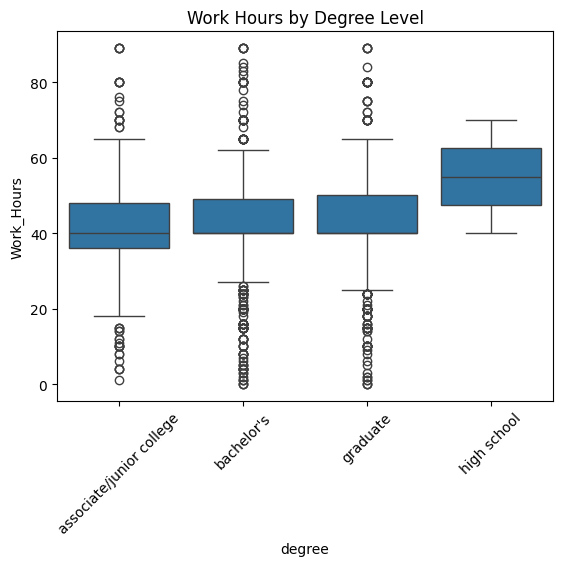

In [21]:
#Explores whether more education correlates with working more hours
sns.boxplot(x='degree', y='Work_Hours', data=df)
plt.title("Work Hours by Degree Level")
plt.xticks(rotation=45)
plt.show()